# Exploratory analysis Rebb2020

This notebook is to have a first glance at the compounded data from the Reeb2020 paper.
The data is a collection 21 of deep mutational scanning studies from 18 unique proteins.
This notebook has all of its dependencies in the pip virtual environment `dms_pip_env`.
The dataset contains all the DMS studies with more than 100 single aminoacid variants (SAVs) available by June 2019.
Scores are mapped to the declared UniProtKB ID or to that of the closest BLAST match.
The dataset is arrange in a series of sets containing all the variants (`SetAll`) or only the variants for which the authors were able to get a prediction with a variety of tools (`SetComm`). All the sets are divided in a beneficial and deleterious subset because of the assays were not symmetrical and further normalization could have skewed results. The other sets (`SetCommSynXX`) contain bynary classifications of the effects, where `XX` is the threshold adopted.

The scores have been processed as follows:
- The WT score has been centered to 0
- The scores have been interpolated so to be between 0 and 1 (1 is maximum effect, either beneficial or detrimental)

All these data were obtained from the Mendeley data deposition made from the authors and available at https://data.mendeley.com/datasets/2rwrkp7mfk/1

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import json

In [3]:
!ls -l ../dataset/Reeb2020/Set*

-rw-r--r-- 1 saul saul 1073605 Feb 21  2020 ../dataset/Reeb2020/SetAll_only_beneficial.csv
-rw-r--r-- 1 saul saul 2428660 Feb 21  2020 ../dataset/Reeb2020/SetAll_only_deleterious.csv
-rw-r--r-- 1 saul saul  491188 Feb 21  2020 ../dataset/Reeb2020/SetCommonSyn90_only_beneficial.csv
-rw-r--r-- 1 saul saul  596186 Feb 21  2020 ../dataset/Reeb2020/SetCommonSyn90_only_deleterious.csv
-rw-r--r-- 1 saul saul  549281 Feb 21  2020 ../dataset/Reeb2020/SetCommonSyn95_only_beneficial.csv
-rw-r--r-- 1 saul saul  832061 Feb 21  2020 ../dataset/Reeb2020/SetCommonSyn95_only_deleterious.csv
-rw-r--r-- 1 saul saul  620979 Feb 21  2020 ../dataset/Reeb2020/SetCommonSyn99_only_beneficial.csv
-rw-r--r-- 1 saul saul  666300 Feb 21  2020 ../dataset/Reeb2020/SetCommonSyn99_only_deleterious.csv
-rw-r--r-- 1 saul saul  817911 Feb 21  2020 ../dataset/Reeb2020/SetCommon_only_beneficial.csv
-rw-r--r-- 1 saul saul  954714 Feb 21  2020 ../dataset/Reeb2020/SetCommon_only_deleterious.csv


The data is organized in a table with position (starting from 1), mutation from and to, normalized functional score, and source study.

In [13]:
df_all_deleterious = pd.read_csv('../dataset/Reeb2020/SetAll_only_deleterious.csv')
df_all_beneficial = pd.read_csv('../dataset/Reeb2020/SetAll_only_beneficial.csv')
df_all_deleterious

,Position(1-indexed),FromAA,ToAA,NormalizedScore,DatasetId
0,2.0,Q,A,0.833333,Adkar2012_CcdB/CCDB_2012_MSSEQ
1,2.0,Q,C,0.333333,Adkar2012_CcdB/CCDB_2012_MSSEQ
2,2.0,Q,D,0.666667,Adkar2012_CcdB/CCDB_2012_MSSEQ
3,2.0,Q,E,1.000000,Adkar2012_CcdB/CCDB_2012_MSSEQ
4,2.0,Q,F,0.500000,Adkar2012_CcdB/CCDB_2012_MSSEQ
...,...,...,...,...,...
45377,431.0,H,Y,0.972343,Traxlmayr2012_IgG1_CH3/IgG1_CH3_HCONF
45378,435.0,H,Y,0.960526,Traxlmayr2012_IgG1_CH3/IgG1_CH3_HCONF
45379,436.0,N,Y,0.960526,Traxlmayr2012_IgG1_CH3/IgG1_CH3_HCONF
45380,437.0,H,Y,0.846749,Traxlmayr2012_IgG1_CH3/IgG1_CH3_HCONF


The WT sequences are in this json file:

In [2]:
json_seqs_filein = open('../dataset/Reeb2020/sequences.json')
json_seqs_dict = json.load(json_seqs_filein)

The json can be sliced by study and by sequence in the study:

In [15]:
mock_index = df_all_deleterious['DatasetId'][0].split('/')
mock_index

['Adkar2012_CcdB', 'CCDB_2012_MSSEQ']

In [16]:
json_seqs_dict[mock_index[0]][mock_index[1]]

'MQFKVYTYKRESRYRLFVDVQSDIIDTPGRRMVIPLASARLLSDKVSRELYPVVHIGDESWRMMTTDMASVPVSVIGEEVADLSHRENDIKNAINLMFWGI'

These are all the 22 dataset IDs in this study. There are some naming inconsistencies among this dataset and the paper:

- HSP90 is reported in the paper as HSP82 in the paper (HSP82 is the name of HSP90 in S.cerevisiae)
- TEM is reported as bla in the paper
- MTHIII is reported as haeIIIM in the paper

In the paper there is also reference to additional dataset not included here. These datasets where used to asses the agreement among different DMS runs on the same protein and I can use them at a later stage. They were taken from Gray2018 (the Envision paper).

- RPL40A_2013, RPL40A_2014, RPL40A_2014_REL
- bla_2014 (which is the same protein as TEM1_2015_SCORE)

In [17]:
set(df_all_deleterious['DatasetId'])

{'Adkar2012_CcdB/CCDB_2012_MSSEQ',
 'Araya2012_YAP1/YAP1_SCORE',
 'Brenan2016_MAPK1/MAPK1_SCORE',
 'Findlay2018_BRCA1/BRCA1_2018_SCORE',
 'Heredia2018_CCR5/CCR5_2018_EXPR_R100',
 'Heredia2018_CXCR4/CXCR4_2018_EXPR_R100',
 'Hietpas2011_HSP90/HSP90_2011_SCORE',
 'Hietpas2013_HSP90/HSP90_2013_SCORE',
 'Jiang2013_HSP90/HSP90_2013_EXP',
 'Kitzman2014_Gal4/GAL4_SCORE',
 'Klesmith2015_LGK/LGK_2015_SCORE',
 'Majithia2016_PPARG/PPARG_SCORE',
 'Matreyek2018_PTEN/PTEN_SCORE',
 'Matreyek2018_TPMT/TPMT_SCORE',
 'RockahShmuel2015_MTH3/MTH3_SCORE',
 'Romero2015_Bgl3/Bgl3_SCORE',
 'Sarkisyan2016_GFP/GFP_2016_SCORE',
 'Starita2013_UBE4B/UBE4B_SCORE',
 'Starita2015_BRCA1/BRCA1_2015_E3',
 'Starita2015_BRCA1/BRCA1_2015_Y2H',
 'Stiffler2015_TEM1/TEM1_2015_SCORE',
 'Traxlmayr2012_IgG1_CH3/IgG1_CH3_HCONF'}

In [18]:
len(set(df_all_deleterious['DatasetId']))

22

There are 18 unique proteins in the dataset (some studies are on the same protein)

In [19]:
set([element.split('/')[1].split('_')[0] for element in set(df_all_deleterious['DatasetId'])])

{'BRCA1',
 'Bgl3',
 'CCDB',
 'CCR5',
 'CXCR4',
 'GAL4',
 'GFP',
 'HSP90',
 'IgG1',
 'LGK',
 'MAPK1',
 'MTH3',
 'PPARG',
 'PTEN',
 'TEM1',
 'TPMT',
 'UBE4B',
 'YAP1'}

In [20]:
len(set([element.split('/')[1].split('_')[0] for element in set(df_all_deleterious['DatasetId'])]))

18

I now look at the overall distribution of scores in the deleterious and beneficial datasets. For the deleterios data there is a significant capping at 1, meaning that some measurement are outside of the upper experimental range. This is less pronounced for the beneficial dataset. In general the most represented value is around 0 with a decaying behaviour towards 1 (excluded).

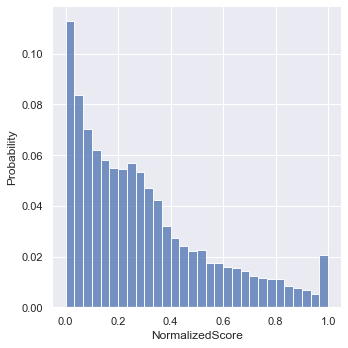

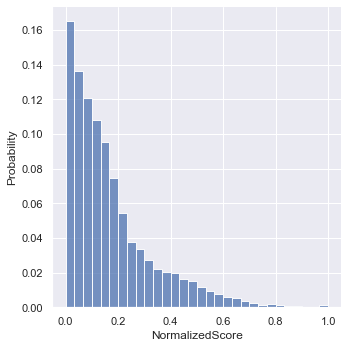

In [21]:
sns.displot(df_all_deleterious, x='NormalizedScore', bins=30, stat='probability')
sns.displot(df_all_beneficial, x='NormalizedScore', bins=30, stat='probability')

Now I do the same but differentiating by study. The output is quite long but it is obvious how the distribution varies widely among studies.

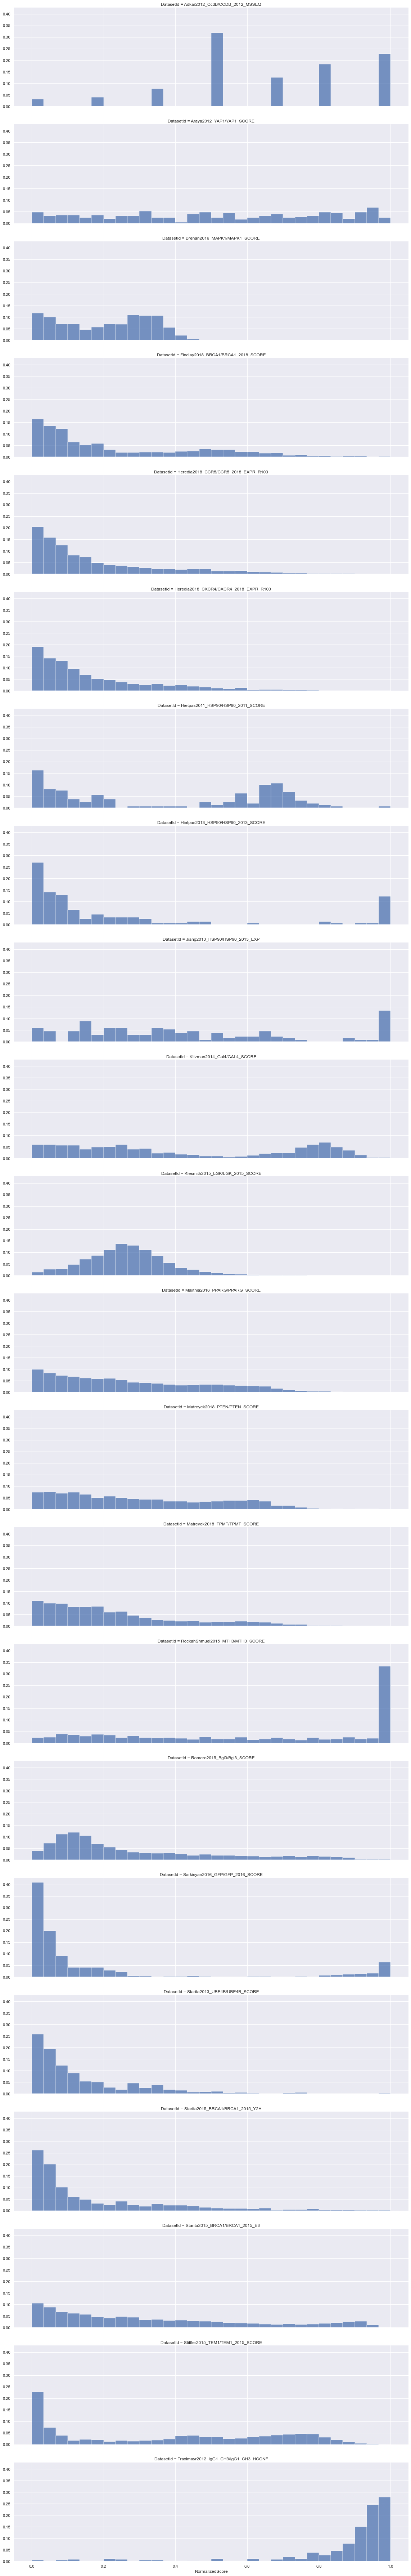

In [23]:
g = sns.FacetGrid(df_all_deleterious, row="DatasetId")
g.map(sns.histplot, "NormalizedScore", bins=30, stat='probability')
g.fig.set_size_inches(20,100)

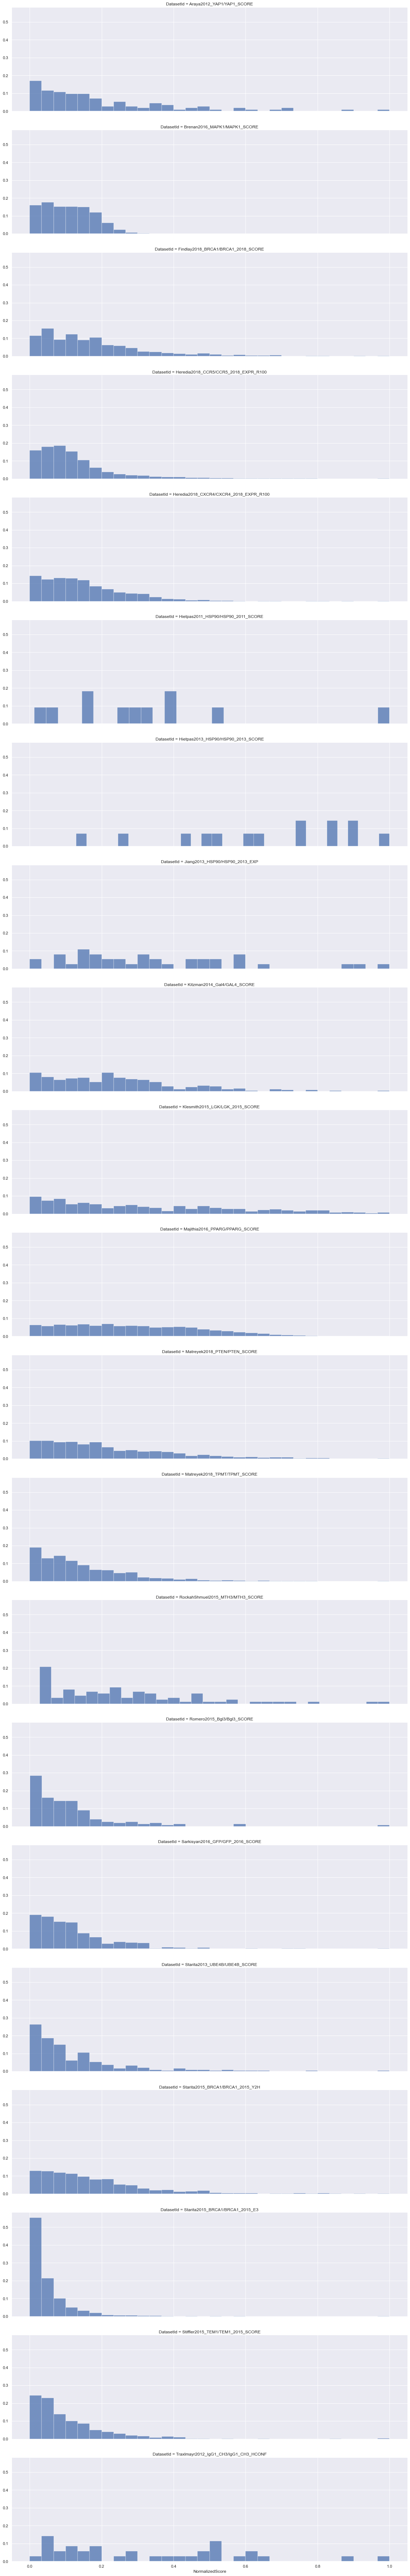

In [24]:
g = sns.FacetGrid(df_all_beneficial, row="DatasetId")
g.map(sns.histplot, "NormalizedScore", bins=30, stat='probability')
g.fig.set_size_inches(20,100)

I can join the beneficial and detrimental datasets by revrsing the sign of the detrimental one

In [25]:
df_all_deleterious['NormalizedScore'] = - abs(df_all_deleterious['NormalizedScore'])
df_all = pd.concat([df_all_beneficial, df_all_deleterious])

I repeat the plots for the full dataset

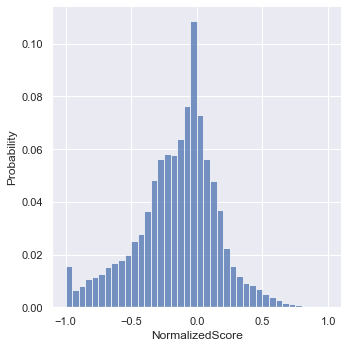

In [26]:
sns.displot(df_all, x='NormalizedScore', bins=40, stat='probability')

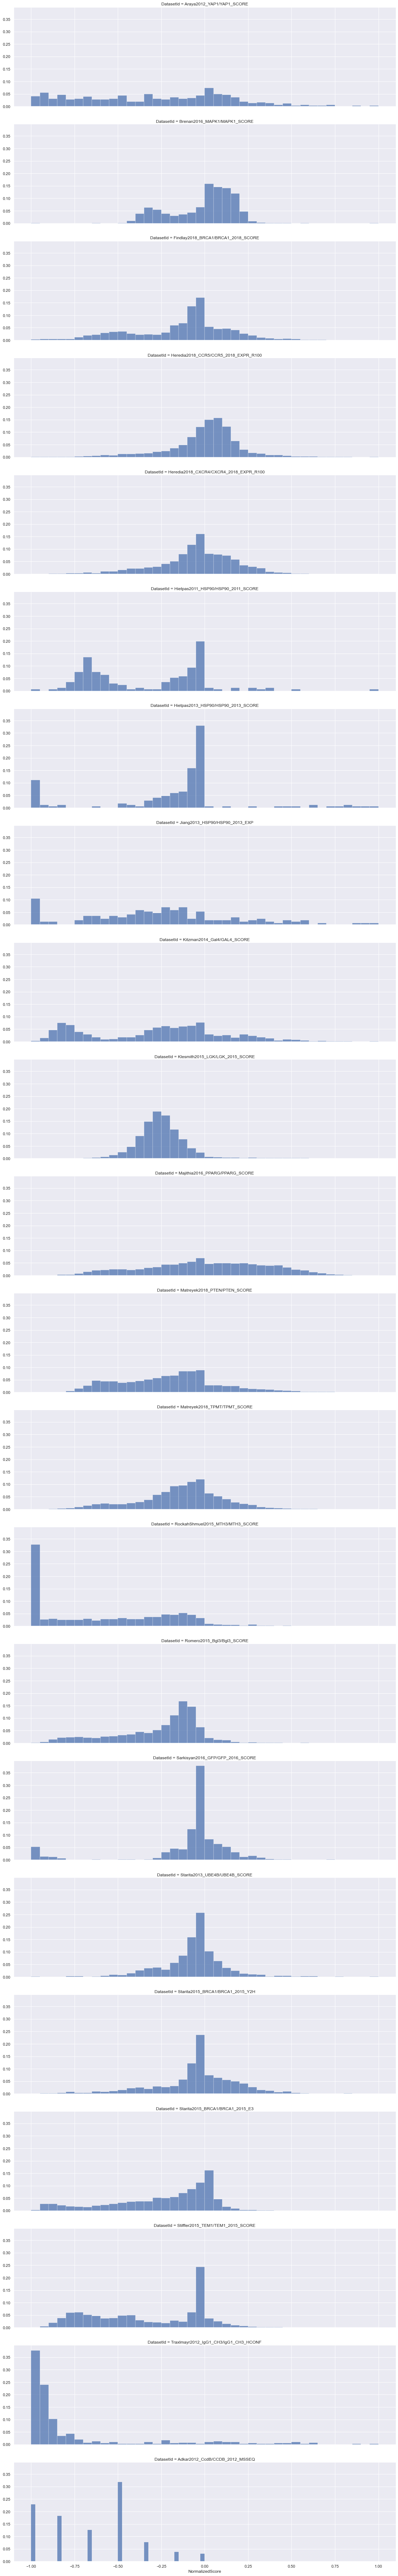

In [29]:
g = sns.FacetGrid(df_all, row="DatasetId")
g.map(sns.histplot, "NormalizedScore", bins=40, stat='probability')
g.fig.set_size_inches(20,100)

Let's see protein length

In [11]:
[json_seqs_dict[key1][key2] for key1 in json_seqs_dict for key2 in json_seqs_dict[key1]]

['MQFKVYTYKRESRYRLFVDVQSDIIDTPGRRMVIPLASARLLSDKVSRELYPVVHIGDESWRMMTTDMASVPVSVIGEEVADLSHRENDIKNAINLMFWGI',
 'MDPGQQPPPQPAPQGQGQPPSQPPQGQGPPSGPGQPAPAATQAAPQAPPAGHQIVHVRGDSETDLEALFNAVMNPKTANVPQTVPMRLRKLPDSFFKPPEPKSHSRQASTDAGTAGALTPQHVRAHSSPASLQLGAVSPGTLTPTGVVSGPAATPTAQHLRQSSFEIPDDVPLPAGWEMAKTSSGQRYFLNHIDQTTTWQDPRKAMLSQMNVTAPTSPPVQQNMMNSASGPLPDGWEQAMTQDGEIYYINHKNKTTSWLDPRLDPRFAMNQRISQSAPVKQPPPLAPQSPQGGVMGGSNSNQQQQMRLQQLQMEKERLRLKQQELLRQAMRNINPSTANSPKCQELALRSQLPTLEQDGGTQNPVSSPGMSQELRTMTTNSSDPFLNSGTYHSRDESTDSGLSMSSYSVPRTPDDFLNSVDEMDTGDTINQSTLPSQQNRFPDYLEAIPGTNVDLGTLEGDGMNIEGEELMPSLQEALSSDILNDMESVLAATKLDKESFLTWL',
 'MVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITLGMDELYK',
 'MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKY